# Bank customers default prediction for the Next Month 

In [133]:
import pandas as pd
import seaborn as sns 

In [134]:
#!pip install xlrd

In [135]:
pd.set_option("display.max_columns", None)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url,header=1, index_col=0)
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data preprocession 

In [136]:
df_credit.shape

(30000, 24)

In [137]:
df_credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

 The data do not have missing values and all the catgories are numeric, therefore we can train the models with the original dataset

### Feature Selection 

In [138]:
X = df_credit.iloc[:, :-1]
y = df_credit.iloc[: , -1]


## Train Test Split 

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Models 

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
model_dt = DecisionTreeClassifier()

In [143]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
model_dt.score(X_train, y_train)

0.9995024875621891

In [145]:
model_dt.score(X_test, y_test)

0.7259595959595959

The model is almost perfect predicting the training data, but predicting the test data the accuracy is much worse. The model is occurring in overfitting. The model is too complex and we have a huge difference between train and test accuracies

## Model Visulization

In [146]:
from sklearn.tree import plot_tree

[Text(0.7515354373573836, 0.9878048780487805, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.5861410723456714, 0.9634146341463414, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.38101065955072166, 0.9390243902439024, 'PAY_AMT3 <= 573.5\ngini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.15914185009084678, 0.9146341463414634, 'BILL_AMT1 <= 470.5\ngini = 0.342\nsamples = 4367\nvalue = [3411, 956]'),
 Text(0.09197105214434077, 0.8902439024390244, 'BILL_AMT6 <= 540.5\ngini = 0.408\nsamples = 1721\nvalue = [1230, 491]'),
 Text(0.06613011712495266, 0.8658536585365854, 'AGE <= 33.5\ngini = 0.429\nsamples = 1321\nvalue = [910, 411]'),
 Text(0.03999095165801835, 0.8414634146341463, 'BILL_AMT2 <= 895.0\ngini = 0.37\nsamples = 564\nvalue = [426, 138]'),
 Text(0.03405834955584642, 0.8170731707317073, 'PAY_AMT3 <= 126.0\ngini = 0.386\nsamples = 509\nvalue = [376, 133]'),
 Text(0.024531844848549277, 0.7926829268292683, 'BIL

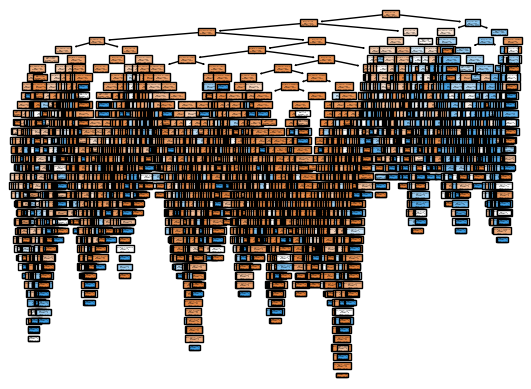

In [147]:
plot_tree(decision_tree = model_dt, feature_names = X_train.columns, filled = True)

### DecisionTreeClassifier with custom Hyperparameters

In [148]:
model= DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 1st configuration 

In [149]:
model = DecisionTreeClassifier(max_depth= 2, min_samples_leaf=150)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [150]:
model.score(X_train, y_train)

0.8186567164179105

In [151]:
model.score(X_test, y_test)

0.8215151515151515

[Text(0.5, 0.8333333333333334, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.25, 0.5, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 1516\nvalue = [875, 641]'),
 Text(0.75, 0.5, 'PAY_5 <= 1.0\ngini = 0.423\nsamples = 2119\nvalue = [643, 1476]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 1232\nvalue = [439, 793]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.354\nsamples = 887\nvalue = [204, 683]')]

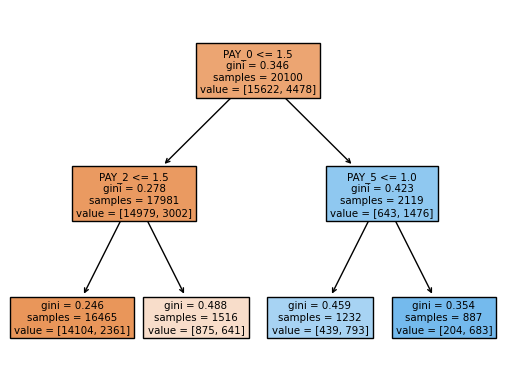

In [152]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled = True)

### 2nd configuration

In [153]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [154]:
model.score(X_train, y_train)

0.8207960199004976

In [155]:
model.score(X_test, y_test)

0.8222222222222222

[Text(0.5, 0.875, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.25, 0.625, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.125, 0.375, 'PAY_AMT3 <= 573.5\ngini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.0625, 0.125, 'gini = 0.342\nsamples = 4367\nvalue = [3411, 956]'),
 Text(0.1875, 0.125, 'gini = 0.205\nsamples = 12098\nvalue = [10693, 1405]'),
 Text(0.375, 0.375, 'PAY_3 <= 1.0\ngini = 0.488\nsamples = 1516\nvalue = [875, 641]'),
 Text(0.3125, 0.125, 'gini = 0.454\nsamples = 719\nvalue = [468, 251]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 797\nvalue = [407, 390]'),
 Text(0.75, 0.625, 'PAY_3 <= -0.5\ngini = 0.423\nsamples = 2119\nvalue = [643, 1476]'),
 Text(0.625, 0.375, 'BILL_AMT1 <= 2325.0\ngini = 0.493\nsamples = 132\nvalue = [74, 58]'),
 Text(0.5625, 0.125, 'gini = 0.433\nsamples = 82\nvalue = [56, 26]'),
 Text(0.6875, 0.125, 'gini = 0.461\nsamples = 50\nvalue = [18, 32]'),
 Text(0.875, 0.375, 'E

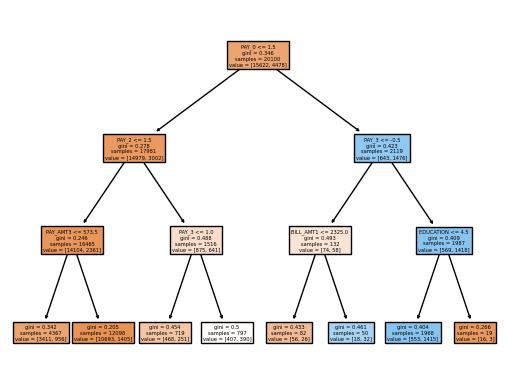

In [156]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled = True)

### 3rd Configuration

In [157]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [158]:
model.score(X_train, y_train)

0.8232338308457712

In [159]:
model.score(X_test, y_test)

0.8205050505050505

[Text(0.5, 0.9, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.25, 0.7, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.125, 0.5, 'PAY_AMT3 <= 573.5\ngini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.0625, 0.3, 'BILL_AMT1 <= 470.5\ngini = 0.342\nsamples = 4367\nvalue = [3411, 956]'),
 Text(0.03125, 0.1, 'gini = 0.408\nsamples = 1721\nvalue = [1230, 491]'),
 Text(0.09375, 0.1, 'gini = 0.29\nsamples = 2646\nvalue = [2181, 465]'),
 Text(0.1875, 0.3, 'PAY_4 <= 1.5\ngini = 0.205\nsamples = 12098\nvalue = [10693, 1405]'),
 Text(0.15625, 0.1, 'gini = 0.198\nsamples = 11865\nvalue = [10546, 1319]'),
 Text(0.21875, 0.1, 'gini = 0.466\nsamples = 233\nvalue = [147, 86]'),
 Text(0.375, 0.5, 'PAY_3 <= 1.0\ngini = 0.488\nsamples = 1516\nvalue = [875, 641]'),
 Text(0.3125, 0.3, 'PAY_AMT2 <= 2242.5\ngini = 0.454\nsamples = 719\nvalue = [468, 251]'),
 Text(0.28125, 0.1, 'gini = 0.482\nsamples = 422\nvalue = [251, 171]'),
 Text

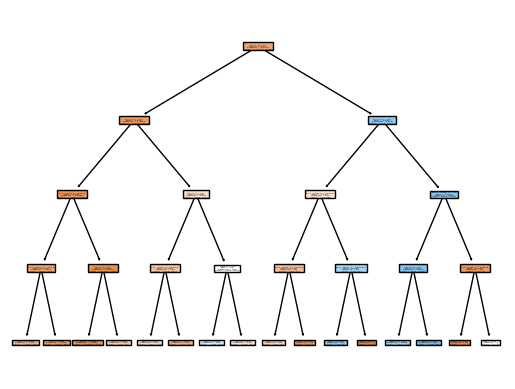

In [160]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled = True)

### 4th Configuration

In [161]:
model = DecisionTreeClassifier(min_samples_leaf=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [162]:
model.score(X_train, y_train)

0.8244278606965174

In [163]:
model.score(X_test, y_test)

0.8161616161616162

[Text(0.7424082200084334, 0.975, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.556501027830487, 0.925, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.33733264811300867, 0.875, 'PAY_AMT3 <= 573.5\ngini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.11068943706514864, 0.825, 'BILL_AMT1 <= 470.5\ngini = 0.342\nsamples = 4367\nvalue = [3411, 956]'),
 Text(0.05397427788319629, 0.775, 'BILL_AMT6 <= 540.5\ngini = 0.408\nsamples = 1721\nvalue = [1230, 491]'),
 Text(0.03373392367699768, 0.725, 'AGE <= 33.5\ngini = 0.429\nsamples = 1321\nvalue = [910, 411]'),
 Text(0.013493569470799072, 0.675, 'PAY_0 <= -1.5\ngini = 0.37\nsamples = 564\nvalue = [426, 138]'),
 Text(0.006746784735399536, 0.625, 'gini = 0.287\nsamples = 184\nvalue = [152, 32]'),
 Text(0.02024035420619861, 0.625, 'PAY_AMT1 <= 210.0\ngini = 0.402\nsamples = 380\nvalue = [274, 106]'),
 Text(0.013493569470799072, 0.575, 'AGE <= 29.5\ngini = 0.432\nsamples = 25

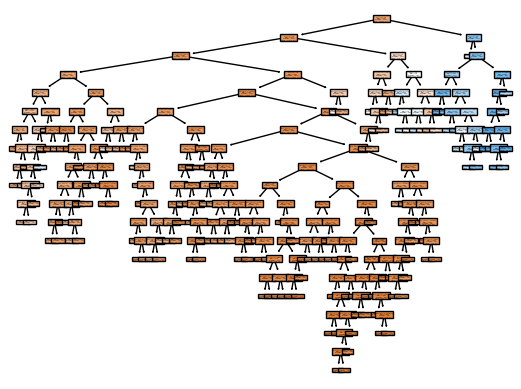

In [164]:
plot_tree(decision_tree = model, feature_names = X_train.columns, filled = True)

### 5th Configuration

In [165]:
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [166]:
model.score(X_train, y_train)

0.8237313432835821

In [167]:
model.score(X_test, y_test)

0.8177777777777778

[Text(0.7515354373573836, 0.9878048780487805, 'PAY_0 <= 1.5\ngini = 0.346\nsamples = 20100\nvalue = [15622, 4478]'),
 Text(0.5861410723456714, 0.9634146341463414, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17981\nvalue = [14979, 3002]'),
 Text(0.38101065955072166, 0.9390243902439024, 'PAY_AMT3 <= 573.5\ngini = 0.246\nsamples = 16465\nvalue = [14104, 2361]'),
 Text(0.15914185009084678, 0.9146341463414634, 'BILL_AMT1 <= 470.5\ngini = 0.342\nsamples = 4367\nvalue = [3411, 956]'),
 Text(0.09197105214434077, 0.8902439024390244, 'BILL_AMT6 <= 540.5\ngini = 0.408\nsamples = 1721\nvalue = [1230, 491]'),
 Text(0.06613011712495266, 0.8658536585365854, 'AGE <= 33.5\ngini = 0.429\nsamples = 1321\nvalue = [910, 411]'),
 Text(0.03999095165801835, 0.8414634146341463, 'BILL_AMT2 <= 895.0\ngini = 0.37\nsamples = 564\nvalue = [426, 138]'),
 Text(0.03405834955584642, 0.8170731707317073, 'PAY_AMT3 <= 126.0\ngini = 0.386\nsamples = 509\nvalue = [376, 133]'),
 Text(0.024531844848549277, 0.7926829268292683, 'BIL

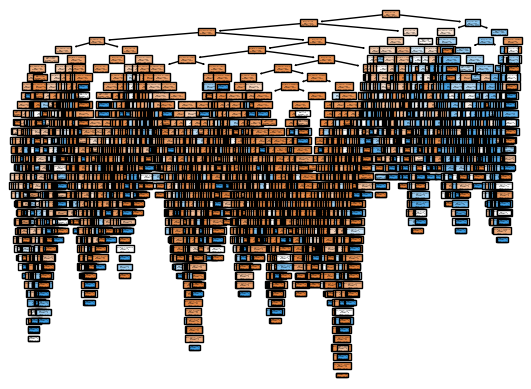

In [168]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True)


### GridSearchCV() to find Best Hyperparameters

In [184]:
model_dt = DecisionTreeClassifier()
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
param_grid = {
    "max_depth": [None, 2, 3, 4, 5, 10],
    "min_samples_leaf" : [1,50,100,200,400,800,1600],
    "criterion" : ["gini", "entropy"]
}

In [187]:
cv_dt = GridSearchCV(estimator = model_dt, param_grid=param_grid,cv = 5, verbose=1)
# They make up to 420 times we compute the function.fit()
# To compare 84 different combinations of the Decision Tree hyperparameters:

In [188]:
cv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

In [189]:
cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}

In [190]:
cv_dt.score(X_test, y_test)

0.8186868686868687

In [176]:
df_cv_dt = pd.DataFrame(cv_dt.cv_results_)
df_cv_dt


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.297475,0.019263,0.004242,0.006089,gini,None,1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.731095,0.725373,0.722139,0.733831,0.720896,0.726667,0.005028,84
1,0.204361,0.027871,0.000000,0.000000,gini,None,50,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.818408,0.815174,0.815920,0.809701,0.810697,0.813980,0.003283,79
2,0.159049,0.011349,0.002991,0.005044,gini,None,100,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.825622,0.818408,0.820647,0.812935,0.815423,0.818607,0.004375,61
3,0.136444,0.002416,0.001659,0.000836,gini,None,200,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.824129,0.817413,0.822139,0.813930,0.815423,0.818607,0.003909,61
4,0.114435,0.004286,0.002870,0.003233,gini,None,400,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.824876,0.815672,0.821144,0.816418,0.815174,0.818657,0.003766,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.178461,0.005824,0.005151,0.006368,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.826119,0.818408,0.819900,0.812935,0.815423,0.818557,0.004482,71
80,0.162196,0.004953,0.003735,0.005996,entropy,10,200,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.824129,0.817413,0.822139,0.813930,0.815423,0.818607,0.003909,61
81,0.139056,0.005367,0.003228,0.005136,entropy,10,400,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.824876,0.815672,0.821144,0.816418,0.815174,0.818657,0.003766,23
82,0.107751,0.004549,0.005272,0.006640,entropy,10,800,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.824876,0.815672,0.821144,0.816418,0.815174,0.818657,0.003766,23


### Support Vector Machines SVC()

In [192]:
# Before computing the Support Vector Machines model, 
# we need to scale the data because this model compares the distance between the explanatory variables.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [193]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)


In [194]:
from sklearn.svm import SVC

In [195]:
model_sv = SVC()
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [196]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

cv_sv = GridSearchCV(estimator = model_sv, param_grid=param_grid, verbose = 2)
cv_sv.fit(X_norm_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   5.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.3s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   4.5s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   7.8s
[CV] END ..................................C=0.1, kernel=rbf; total time=   8.1s
[CV] END .................................C=1, kernel=linear; total time=   4.5s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [200]:
cv_sv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [201]:
cv_sv.score(X_norm_test, y_test)

0.8185858585858586

In [202]:
cv_sv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)>

### KNeighborsClassifier()

In [203]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier()
model_kn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [204]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid, verbose=2)
cv_kn.fit(X_norm_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.1s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=10, metric=minkowski, n

[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   0.2s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=3; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   0.3s
[CV] END ......leaf_size=20, metric=manhattan, n_neighbors=5; total time=   0.3s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   0.3s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   0.3s
[CV] END .....leaf_size=20, metric=manhattan, n_neighbors=10; total time=   0.3s
[CV] END .....leaf_size=20, 

[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=3; total time=   0.1s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   0.1s
[CV] END ......leaf_size=50, metric=euclidean, n_neighbors=5; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=10; total time=   0.1s
[CV] END .....leaf_size=50, metric=euclidean, n_neighbors=20; total time=   0.1s
[CV] END .....leaf_size=50, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=2)

In [212]:
cv_kn.best_params_

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}

In [213]:
cv_kn.score(X_norm_test, y_test)

0.8076767676767677

In [214]:
dic_results = {
    'model': [
        cv_dt.best_estimator_,
        cv_sv.best_estimator_,
        cv_kn.best_estimator_
    ],
    'hyperparameters': [
        cv_dt.best_params_,
        cv_sv.best_params_,
        cv_kn.best_params_
    ],
    'score': [
        cv_dt.score(X_test, y_test),
        cv_sv.score(X_norm_test, y_test),
        cv_kn.score(X_norm_test, y_test)
    ]
}

df_cv_comp = pd.DataFrame(dic_results)
df_cv_comp.style.background_gradient()


,model,hyperparameters,score
0,"DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100)","{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100}",0.818687
1,SVC(C=10),"{'C': 10, 'kernel': 'rbf'}",0.818586
2,"KNeighborsClassifier(leaf_size=10, n_neighbors=20)","{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}",0.807677
